In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv('health care diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Project Task: Week 1
#Data Exploration:

#Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

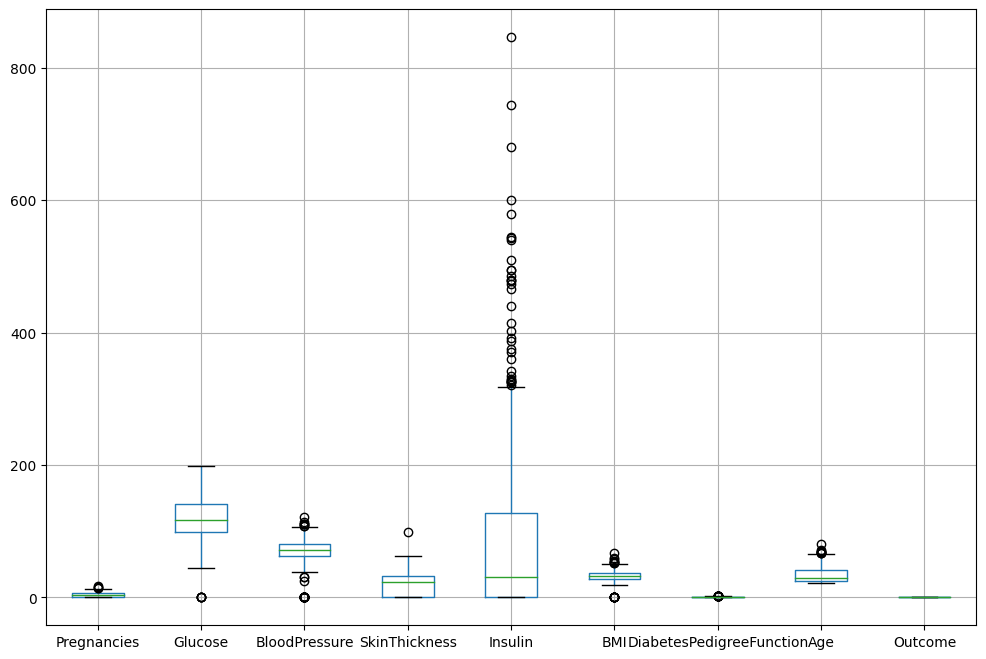

In [ ]:
plt.figure(figsize=(12,8))
df.boxplot()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
#How much percentage zeroes are present in this coloumn'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'.
df[df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]==0].count()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
#The mdeian calculation is considering the zeroes present in the feature insluin and thus median is wrong value.
df['Insulin'].median()

30.5

In [ ]:
#We need to calculate mean without zero
#The median value for feature Insulin bfeore removing 0 is 30.5 and after removig 0 is 125.0
df[df['Insulin']!=0]['Insulin'].median()


125.0

In [ ]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
  print(i,'old median:',df[i].median())
  Median_Value=df[df[i]!=0][i].median()
  print (Median_Value, '\n')
  df[i].replace(0,Median_Value,inplace=True )

Glucose old median: 117.0
117.0 

BloodPressure old median: 72.0
72.0 

SkinThickness old median: 23.0
29.0 

Insulin old median: 30.5
125.0 

BMI old median: 32.0
32.3 



In [ ]:
df[df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]==0].count()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [ ]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [ ]:
df.dtypes.value_counts(normalize=True)*100

int64      77.777778
float64    22.222222
dtype: float64

<Axes: >

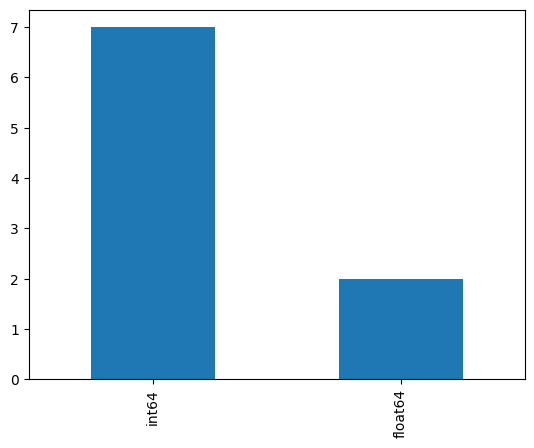

In [ ]:
df.dtypes.value_counts().plot(kind='bar')

In [ ]:
#Project Task: Week 2
#Data Exploration:
#Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<Axes: >

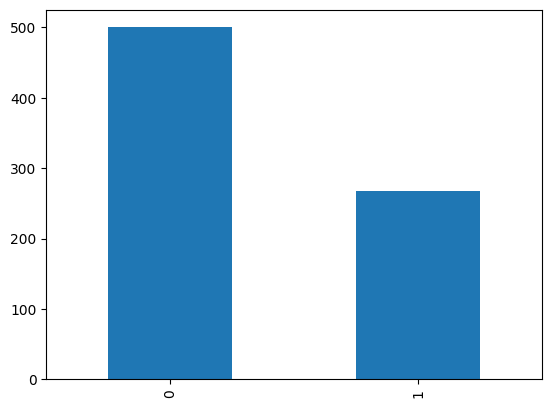

In [ ]:
df.Outcome.value_counts().plot(kind='bar')

In [ ]:
#Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

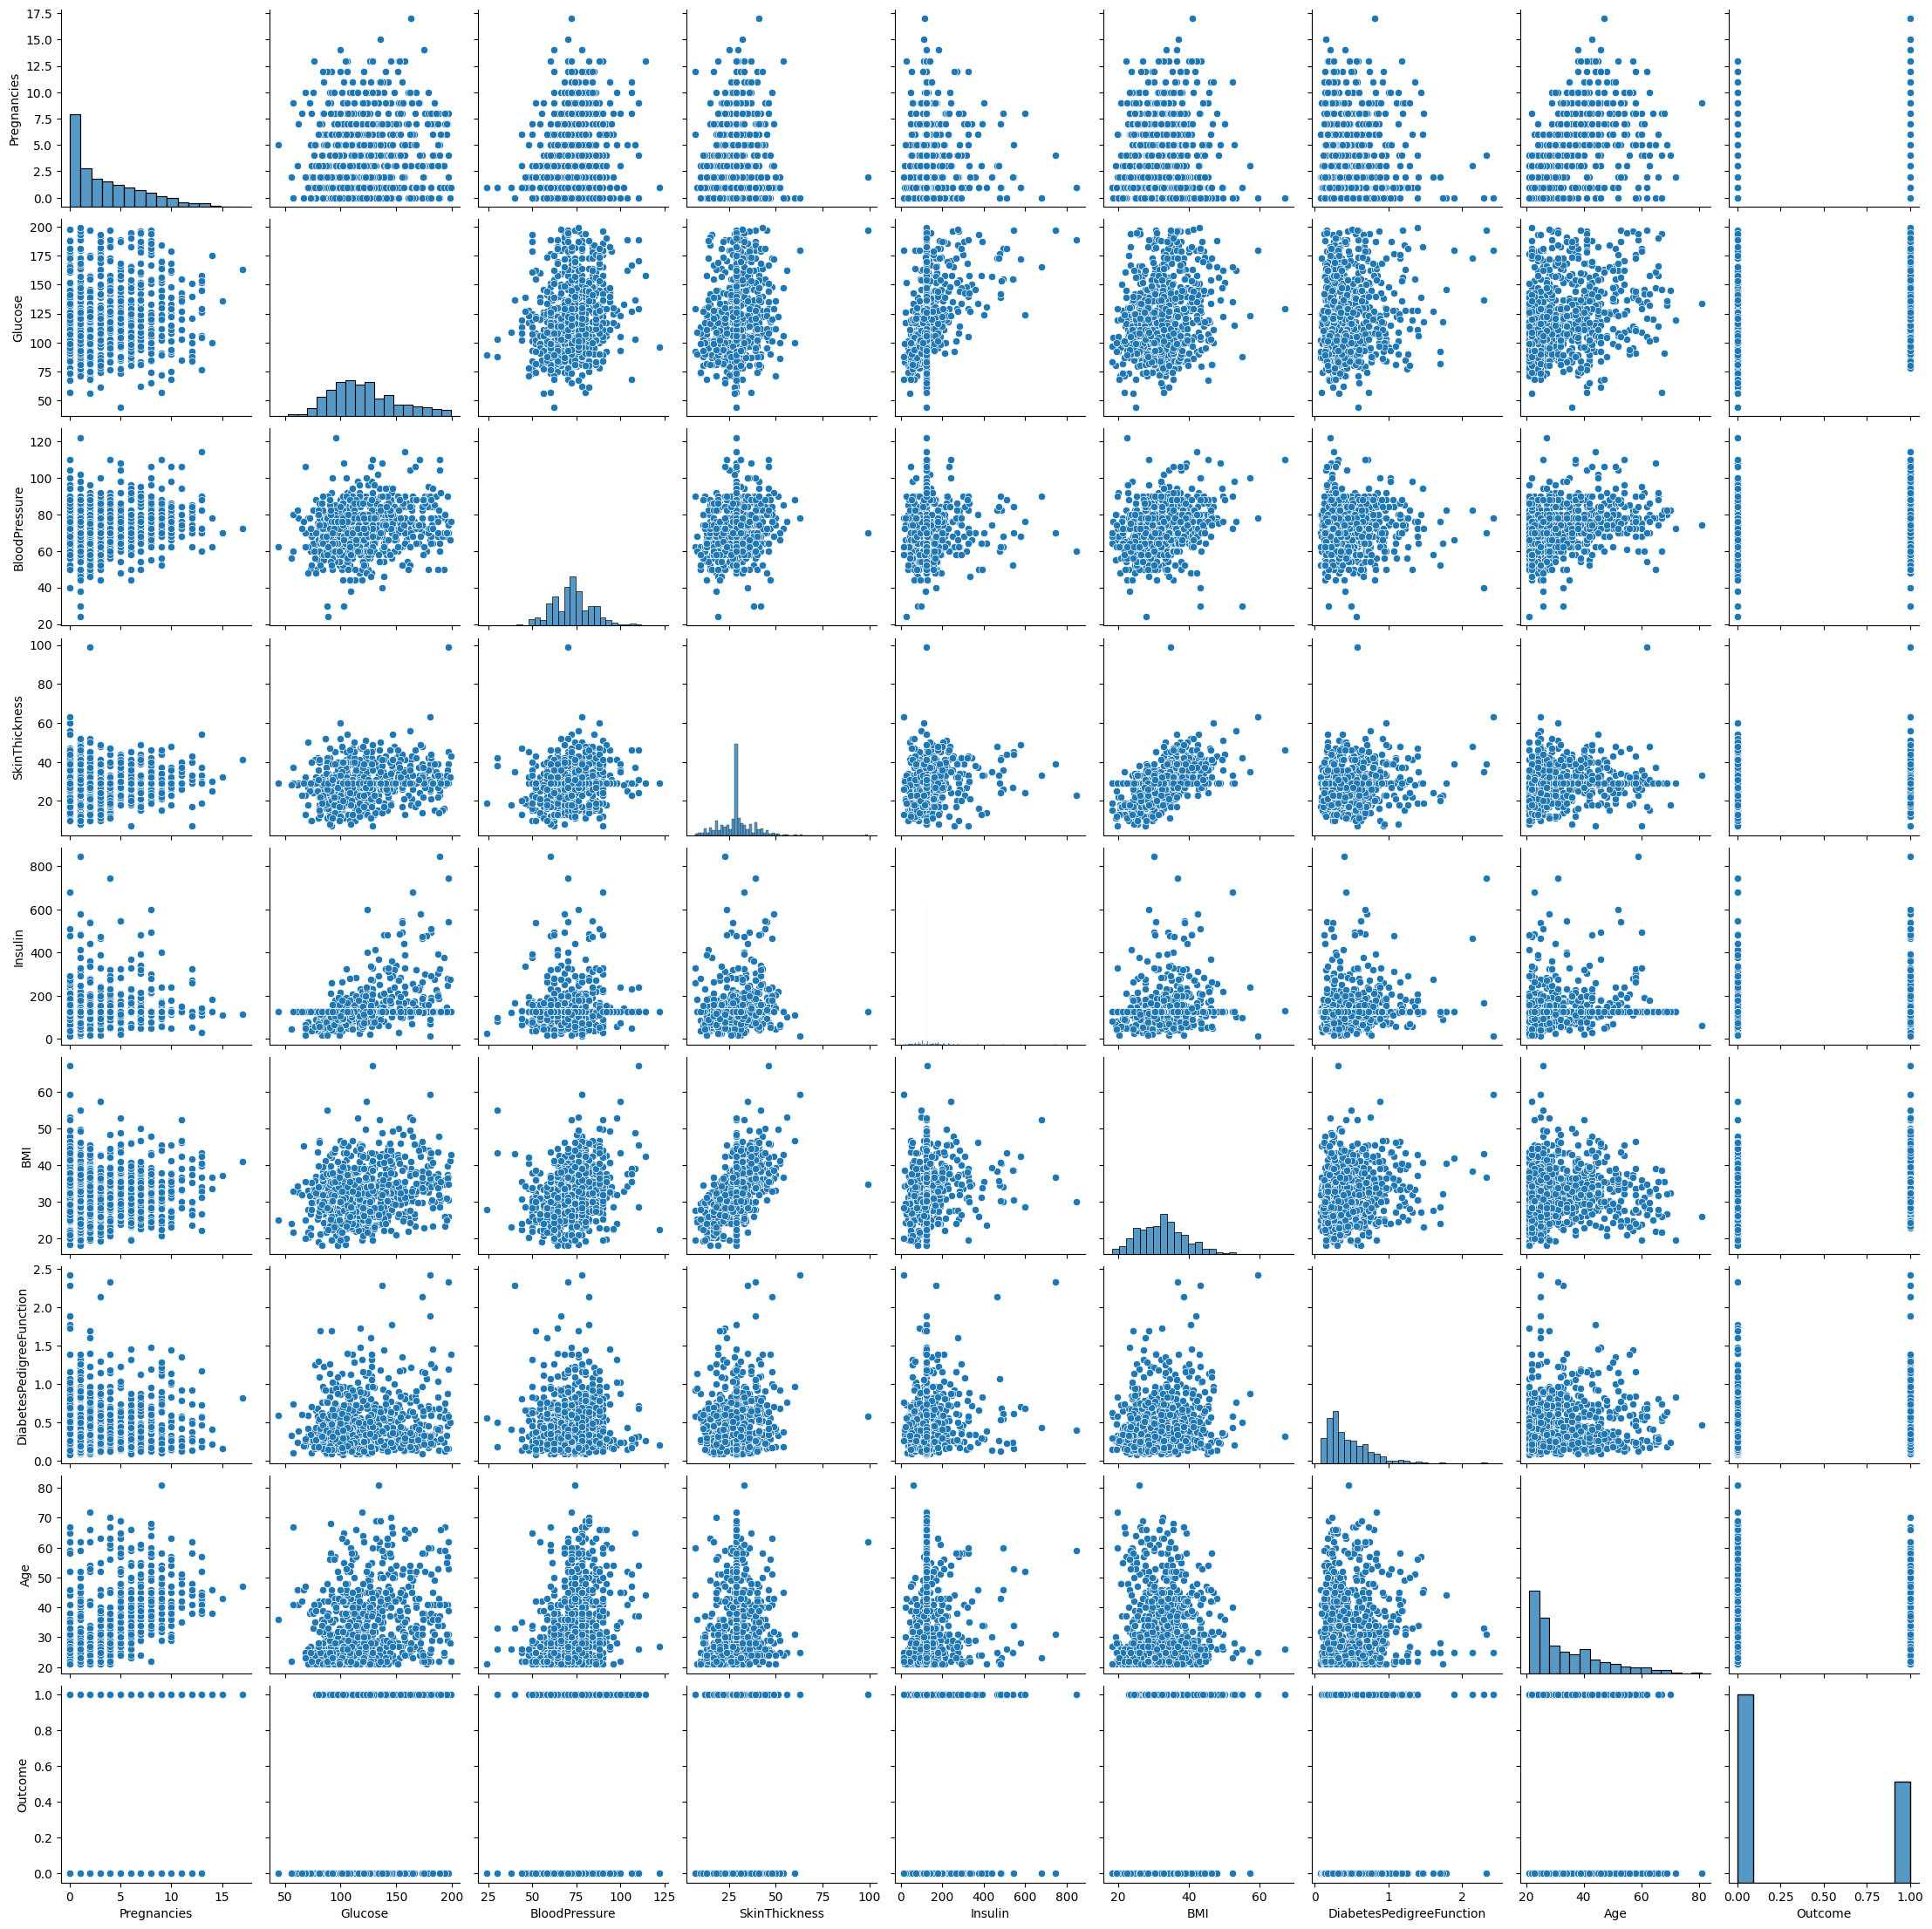

In [ ]:
sns.pairplot(df)

In [ ]:

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

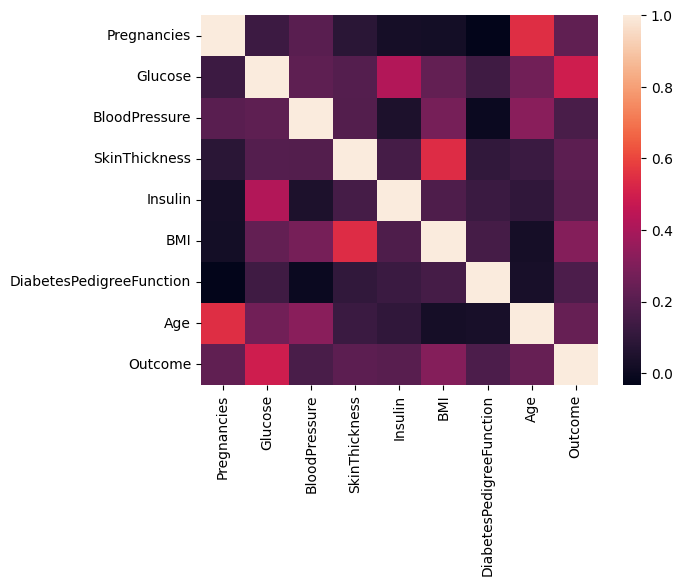

In [ ]:
sns.heatmap(df.corr())

Project Task: Week 3
Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = df.drop('Outcome', axis=1)   #Features
y = df['Outcome']               #Target

In [ ]:
df.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

So we are having class imbalance issue.

In [ ]:
# Stratify is used to preserves proportions/homogeneous group of train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=15,stratify=y)

In [ ]:
X_train.shape

(576, 8)

In [ ]:
X_test.shape

(192, 8)

In [ ]:
y_train.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaler = MinMaxScaler()
Scaler = StandardScaler()

In [ ]:
Scalled_X_train = Scaler.fit_transform(X_train)

In [ ]:
Scalled_X_test = Scaler.transform(X_test)

In [ ]:
Model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
Model.fit(Scalled_X_train,y_train)

KNeighborsClassifier()

In [ ]:
Model.score(Scalled_X_train,y_train)

0.8298611111111112

In [ ]:
Model.score(Scalled_X_test,y_test)

0.7604166666666666

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
y_pred = Model.predict(Scalled_X_test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0    129
1     63
dtype: int64

In [ ]:
# In Health Care domain the recall is widely used metric
# Sensitivity -> Recall of class 1
# Sensitivity -> Recall of class 0
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.67      0.63      0.65        67

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[104  21]
 [ 25  42]]


<Axes: >

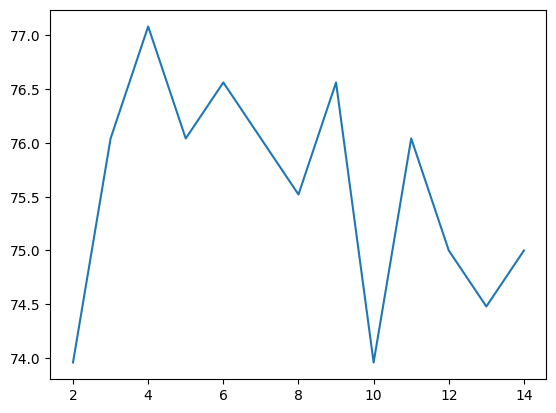

In [ ]:
acc=[] #Accuracy
ran=range(2,15) #Range

for k in ran:
  Model = KNeighborsClassifier(n_neighbors=k)
  Model.fit(Scalled_X_train,y_train)
  test_acc = Model.score(Scalled_X_test,y_test)
  acc.append(test_acc*100)
sns.lineplot(x=ran,y=acc)


So best value of K is 4.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators=500, max_depth=3)

In [ ]:
RF_model.fit(Scalled_X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500)

In [ ]:
RF_model.score(Scalled_X_train, y_train)

0.8055555555555556

In [ ]:
RF_model.score(Scalled_X_test, y_test)

0.7604166666666666

In [ ]:
rf_y_pred = RF_model.predict(Scalled_X_test)

In [ ]:

pd.DataFrame(rf_y_pred).value_counts()

0    147
1     45
dtype: int64

In [ ]:
# In Health Care domain the recall is widely used metric
# Sensitivity -> Recall of class 1
# Sensitivity -> Recall of class 0
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.73      0.49      0.59        67

    accuracy                           0.76       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.76      0.75       192



In [ ]:
print(confusion_matrix(y_test,rf_y_pred))

[[113  12]
 [ 34  33]]


Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
a. Pie chart to describe the diabetic or non-diabetic population
b. Scatter charts between relevant variables to analyze the relationships
c. Histogram or frequency charts to analyze the distribution of the data
d. Heatmap of correlation analysis among the relevant variables
e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

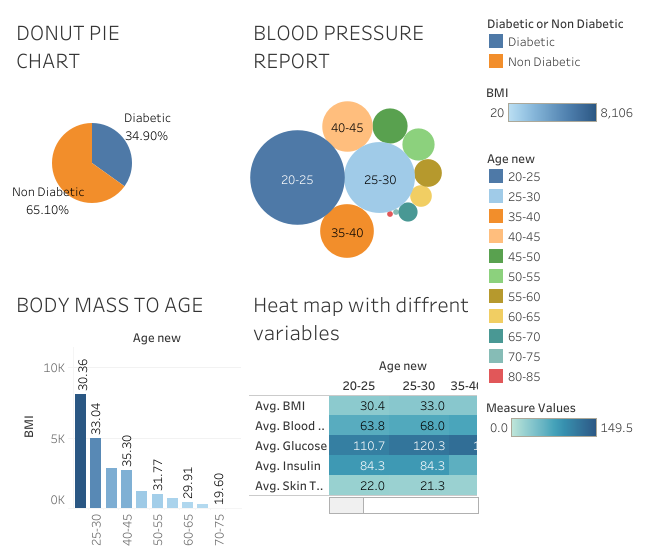

In [10]:
from IPython.display import Image
Image('Dashboard 1.png')